# Euclidean vs. Cosine Similarity

## When to use which distance metric? 

This notebook compares two different measures of distance in a vector space and why either has its function under different circumstances. 

Starting off with quite a straight-forward example... 
* we have our vector space X, that contains instances with animals. 
* They are measured by their length, and weight. 
* They have also been labelled by their stage of aging (young = 0, mid = 1, adult = 2). 

Source: https://cmry.github.io/notes/euclidean-v-cosine

<AxesSubplot:xlabel='weight', ylabel='length'>

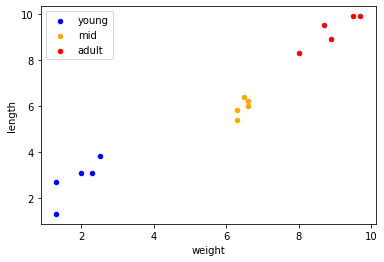

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

# Dataset we are working with.
X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])

# Turn numpy array into dataframe
df = pd.DataFrame(X, columns=['weight', 'length', 'label'])

# Plot the data on a scatter plot
ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax

Looking at the Scatter Plot: 

* the three classes are pretty well distinguishable by these two features that we have. 
* Say that we apply k-NN to our data that will learn to classify new instances based on their distance to our known instances (and their labels). 
* The algorithm needs a distance metric to determine which of the known instances are closest to the new one. 
* Let’s try to choose between either euclidean or cosine for this example.


## Euclidean Distance

Our euclidean distance function can be defined as follows:

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/33c51af836e0c5bcbdf9fb2ab0e1a383c55e3ce9)

In [4]:
# in code
def euclideanDistance(q, p):
    return np.sqrt(np.sum((q - p)**2))

In [5]:
# Some examples from the dataset

x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1]

print("Examples Vectors: \n", "x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14, "\n")

# Euclidean Distance examples
print("Euclidean Distance:" , "\n",
      "x14 and x0:", euclideanDistance(x14, x0), "\n",
      "x14 and x1:", euclideanDistance(x14, x1), "\n",
      "x14 and x4:", euclideanDistance(x14, x4))



Examples Vectors: 
 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
x14: [1.3 1.3] 

Euclidean Distance: 
 x14 and x0: 7.218032973047436 
 x14 and x1: 12.021647141718974 
 x14 and x4: 1.4000000000000001


<AxesSubplot:xlabel='weight', ylabel='length'>

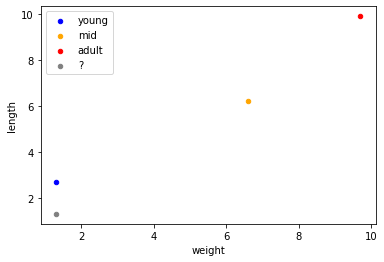

In [6]:
df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax = df3.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)
ax

According to euclidean distance, instance #14 is closest to #4. 

Our 4th instance had the label: 0 = young, which is what we would visually also deem the correct label for this instance.

Now let’s see what happens when we use Cosine similarity.

## Cosine Similarity 

Our cosine similarity function can be defined as follows:
Where a and b are two vectors. 

![cosine](https://wikimedia.org/api/rest_v1/media/math/render/svg/350bc79a3e277bbe96b2d1bc081a599dbc898c35)




In [7]:
def cosineSimilarity(a, b):
    return np.divide(np.dot(a, b), (np.sqrt(np.dot(a, a)) * np.sqrt(np.dot(b, b))))

In [8]:
# Let’s see these calculations for all our vectors:

print(" x14 and x0:", cosineSimilarity(x14, x0), "\n",
      "x14 and x1:", cosineSimilarity(x14, x1), "\n",
      "x14 and x4:", cosineSimilarity(x14, x4), "\n")

print("According to cosine similarity, instance #14 is closest to #1. However, our 1st instance had the label:", "\n", 
    X[1], "-> label: 2 = adult, which is definitely NOT what we would deem the correct label!")

 x14 and x0: 0.9995120760870786 
 x14 and x1: 0.9999479424242859 
 x14 and x4: 0.9438583563660174 

According to cosine similarity, instance #14 is closest to #1. However, our 1st instance had the label: 
 [9.7 9.9 2. ] -> label: 2 = adult, which is definitely NOT what we would deem the correct label!


## So. What happended?

Consider the following picture: 

<img src="https://cmry.github.io/sources/eucos.png" height = 400 >


This is a visual representation of both **euclidean distance** (d) and **cosine similarity** (θ).

While cosine looks at the **angle** between vectors (thus not taking into account their weights or magnitudes), euclidean distance is similar to using a ruler to actually measure the **distance**. 

# When to use cosine?

Cosine similarity is generally used as a metric for **measuring distance when the magnitude of the vectors does not matter**. This happens for example when working with text data represented by word counts. We could assume that when a word (e.g. `science`) occurs more frequent in document 1, than it does in document 2, that document 1 is more related to the topic of `science`. 

However it could also be the case that we are wokring with documents of **uneven lengths** (Wikipedia articles for example). Then, `science` probably occured more in document 1 just because it was way longer than document 2. 

_Cosine similarity corrects for this:_

**Text data is the most typical example for when to use this metric.** However, you might also want to apply cosine similarity for other cases where some properties of the instances make so that weights might be larger without meaning anything different. Sensor values that were captured in various lenghts (in time) between instances could be such an example. 

# How do euclidean and cosine similarity relate?

..... to be added. 

# Cosine in Action

So when is cosine handy? 
Let's consider four articles from Wikipedia. We use the `Wikipedia API` to extract them, after which we can access their text with the `.content`method. 

In [21]:
import wikipedia


q1 = wikipedia.page(pageid=233488)  # Machine learning
q2 = wikipedia.page(title='Artifical Intelligence')
q3 = wikipedia.page(title='Soccer')
q4 = wikipedia.page(pageid=29773) # Tennis 

We represent these by their frequency vectors. Each instance is a document, and each word will be a feature. The feature values will then represent how many times a word occurs in a certain document. So the feature `ball`, will probalby be 0 for both machine learning and AI, but definitely not 0 for soccer and tennis. 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = np.array(cv.fit_transform([q1.content, q2.content, q3.content, q4.content]).todense())

The `CountVectorizer`by default splits up the text into words using white spaces. We can do the same to see how many words are in each article. Like this: 

In [23]:
print("ML \t", len(q1.content.split()), "\n"
      "AI \t", len(q2.content.split()), "\n"
      "soccer \t", len(q3.content.split()), "\n"
      "tennis \t", len(q4.content.split()))

ML 	 7366 
AI 	 11885 
soccer 	 6620 
tennis 	 11660


`AI` is a much larger article than `ML`. This would mean that **if we do not normalize our vectors, AI will be much further away from ML just because it has many more words**. ML will probably be closer to an article with less words. Let's try it out. 

In [24]:
print("ML - AI \t", euclideanDistance(X[0], X[1]), "\n"
      "ML - soccer \t", euclideanDistance(X[0], X[2]), "\n"
      "ML - tennis \t", euclideanDistance(X[0], X[3]))

ML - AI 	 473.66549378226824 
ML - soccer 	 452.59805567412684 
ML - tennis 	 808.791073145593


Here we can see pretty clearly that our prior assumptions have been confirmed. ML seems to be closest to soccer, which doesn't make a lot of sense intuitively. So, what happens if we look at **cosine similairty (i.e. normalizing our vectors!!)**

In [25]:
print("ML - AI \t", cosineSimilarity(X[0], X[1]), "\n"
      "ML - soccer \t", cosineSimilarity(X[0], X[2]), "\n"
      "ML - tennis \t", cosineSimilarity(X[0], X[3]))

ML - AI 	 0.8611659486535193 
ML - soccer 	 0.796701916323166 
ML - tennis 	 0.8106685696577589


ML is closer to AI! Granted, it still seems pretty close to soccer an tennis judging from these score, but please not that word frequency is not that great of a representation for texts with such rich content in general. 

# References

* 
* https://cmry.github.io/notes/euclidean-v-cosine
* https://paulrohan.medium.com/euclidean-distance-and-normalization-of-a-vector-76f7a97abd9 
